# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Young-Min Kong

Datum: 15. November 2023

Gruppe: 12

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Inwiefern beeinflusst die Umgebungstemperatur die Temperaturänderung eines Behälters mit heißem Wasser über einen Zeitraum von 10 Minuten, und wie kann dieser Einfluss durch den Koeffizienten des Newtonschen Abkühlungsgesetzes quantifiziert werden?

## Versuchsaufbau und Durchführung

Materialien:
1. Eine Tasse oder Becher mit heißem Wasser
2. Zwei Temperatursensoren

Vorbereitung:
Eine Temperatursensor in den Behälter legen.
Den anderen Sensor außerhalb des Behälters an der Umgebung legen.

Durchführung:
Temperatur über einen Zeitraum von 10 Minuten messen.

Messungen:
Temperaturdaten in data/data2.h5 registriert.


Foto vergessen. Ist aber ähnlich wie das vom ersten Versuch:

<img src="figures/Versuch1.jpg" width="800">

## Versuchsauswertung

In [2]:
import numpy as np
import pandas as pd
import h5py as h5
from datetime import datetime
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")

### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [3]:
path = r"data/data2.h5"

In [8]:
f = h5.File(path)

dset_env = f[list(f.keys())[0]]
dset_warm = f[list(f.keys())[1]]

df_env = pd.DataFrame({'Timestamp': np.array([i - dset_env[1][0] for i in dset_env[1]]),
                    'temperature': np.array(list(dset_env[0]))})
df_warm = pd.DataFrame({'Timestamp': np.array([i - dset_warm[1][0] for i in dset_warm[1]]),
                    'temperature': np.array(list(dset_warm[0]))})

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

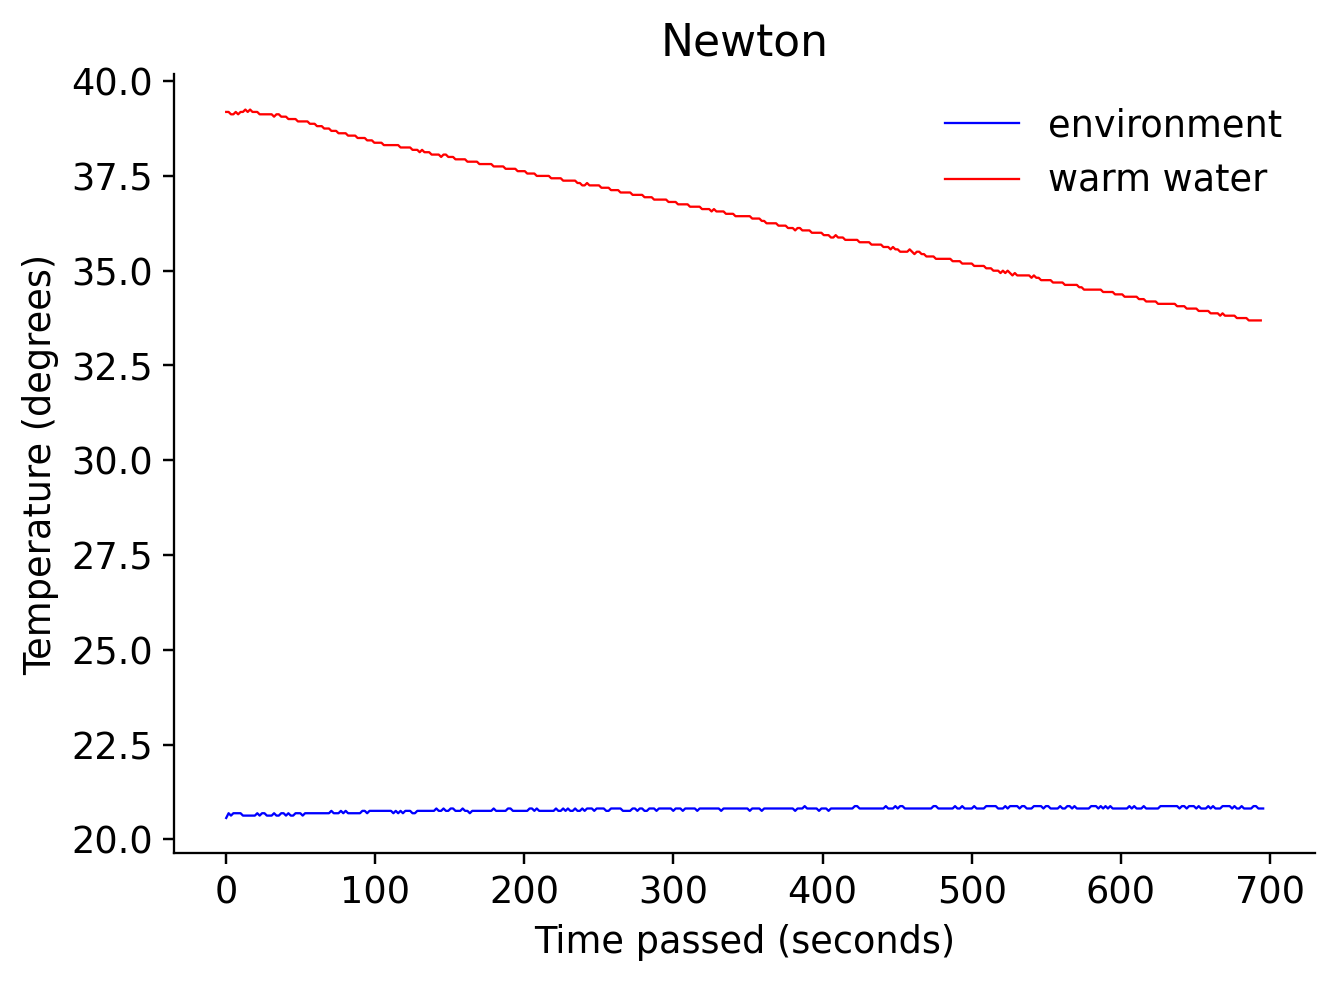

In [106]:
plt.plot(df_env.Timestamp, df_env.temperature, label = "environment", color = "b")
plt.plot(df_warm.Timestamp, df_warm.temperature, label = "warm water", color = "r")

plt.title("Newton")
plt.legend()
plt.xlabel("Time passed (seconds)")
plt.ylabel("Temperature (degrees)")
plt.show()

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [109]:
# init
T_1 = df_warm.temperature.iloc[0]
T_2 = df_warm.temperature.iloc[-1]
t = df_warm.Timestamp.to_numpy()
T_delta = df_warm.temperature.sub(pd.Series(np.ones(len(df_warm.temperature)) * T_2))
T_delta = T_delta.to_numpy()[T_delta.to_numpy() != 0] # delete all zeros from array
t = t[:len(T_delta)] # adjust time series

# 1. Linear Transformation:
# y = a*exp(K*t) with y = T(t)-T2; a = (T1-T2)
# => ln(y) = ln(a) + K*t
# 2. Linear Regression:
K, ln_a = np.polyfit(t, np.log(T_delta), 1)

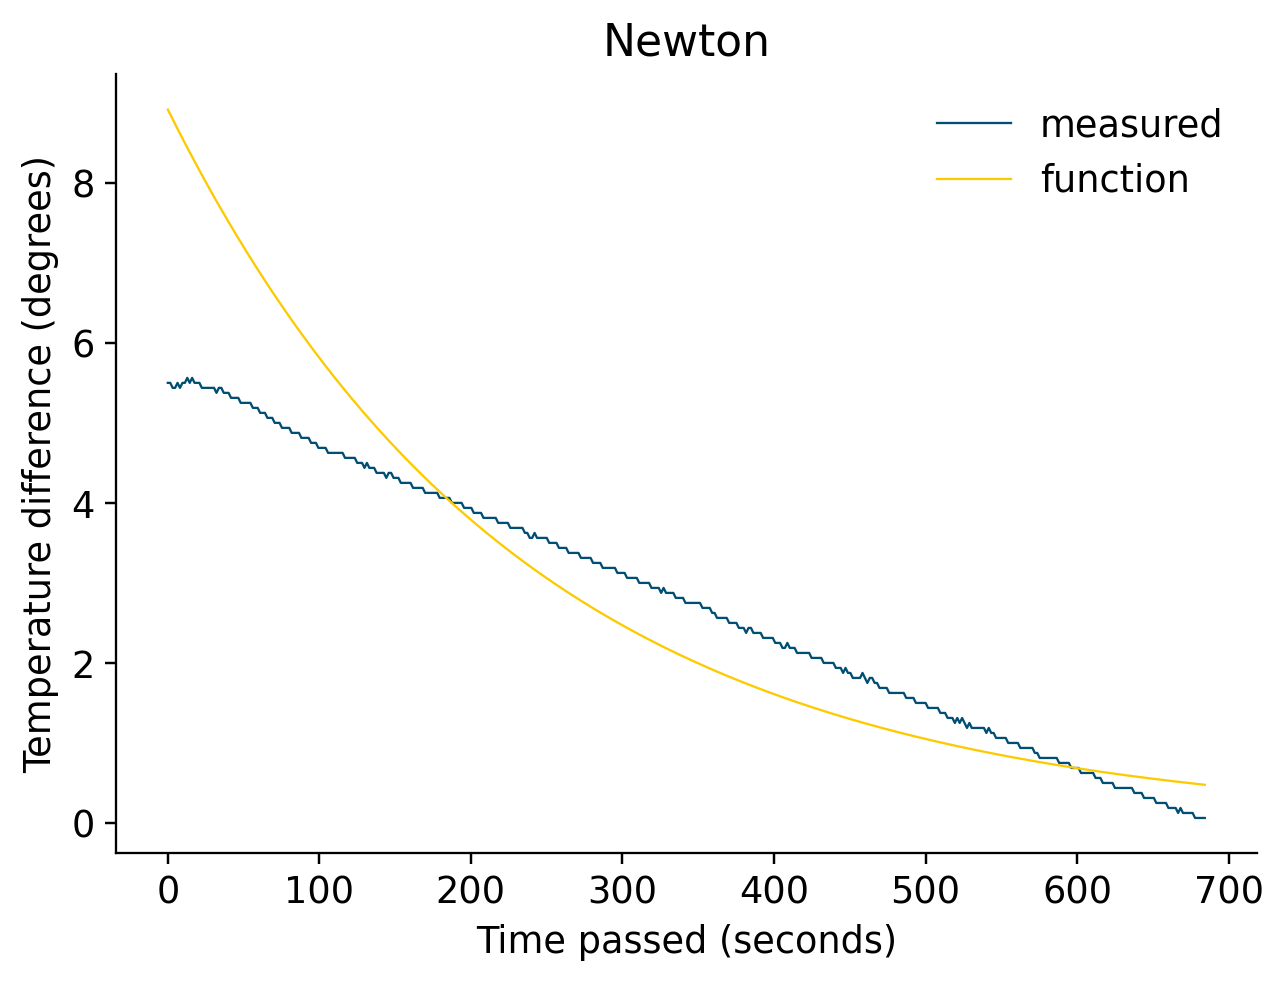

In [111]:
# 3. Check result
T_delta2 = np.exp(ln_a) * np.exp(K * t)

# plot
plt.plot(t, T_delta, label = 'measured')
plt.plot(t, T_delta2, label = 'function')

plt.title("Newton")
plt.legend()
plt.xlabel("Time passed (seconds)")
plt.ylabel("Temperature difference (degrees)")
plt.show()

#### (iV) Ergebnis

In [115]:
print("Koeffizient:", K)

Koeffizient: -0.004278318862913698


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Ein negativer Wert von K weist darauf hin, dass die Temperaturdifferenz exponentiell mit der Zeit abnimmt, was im Einklang mit dem Newtonschen Abkühlungsgesetz steht.
Die Messadaten und die Funktion stimmen nicht ganz überein. Dies hat viele Gründe. Einer von den Gründen ist die niedrige Anfangstemperatur. 

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Dieser Versuch bot wertvolle Erkenntnisse über die Koeffizienten Koeffizient in Newtonschem Abkühlungsgesetz von Wasser und die damit verbundenen Faktoren.